# Программирование на `C++` и `python`
## Лекция 7. `SciPy`: научные вычисления

Воробьев Виталий Сергеевич, 25.11.2020

## Что такое SciPy?
* A Python-based ecosystem of open-source software for mathematics, science, and engineering
* Как произносить: “Sigh Pie” («Сай-пай»)
* Сайт: [scipy.org](scipy.org)
* Что почитать:
 * [docs.scipy.org](docs.scipy.org)
 * [scipy-lectures.org](scipy-lectures.org)
 * [github.com/jakevdp/PythonDataScienceHandbook](github.com/jakevdp/PythonDataScienceHandbook)


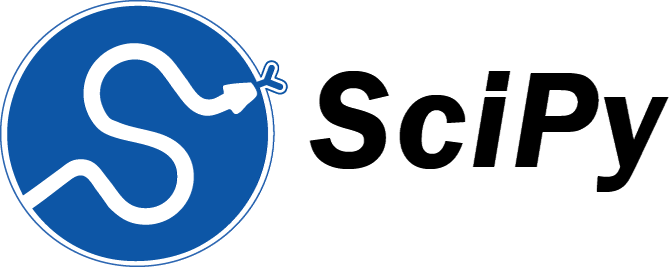

Базовые пакеты:
* `NumPy` – пакет для работы с многомерными массивами. Фундамент стека SciPy
* `SciPy library` – библиотека для научных вычислений
* `Matplotlib` – мощная библиотека для 2D рисования
* `pandas` – инструменты для хранения и анализа данных
* `Sympy` – символьная математика
* `IPython` – улучшенная интерактивная консоль

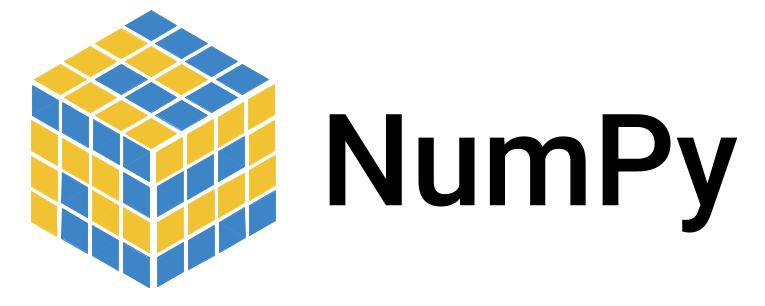
* Массивы `numpy`
* Операции с массивами
* Работа с файлами

### `numpy array`
Memory-efficient and fast container for numerical operations

In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 2, 3])
print(a)

[0 1 2 3]


In [3]:
a.ndim

1

In [4]:
a.shape

(4,)

In [5]:
a.size

4

In [6]:
a.dtype

dtype('int64')

In [7]:
a[0]

0

<img src="figs/mcqueen.png" height=200px/>

In [17]:
a = np.arange(1000)

In [18]:
%%timeit
a**2

1.37 µs ± 51.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [19]:
l = list(range(1000))

In [20]:
%%timeit
[i**2 for i in l]

255 µs ± 19.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
print(np.arange(10))

[0 1 2 3 4 5 6 7 8 9]


In [22]:
print(np.arange(1, 9, 2))

[1 3 5 7]


In [23]:
print(np.linspace(0, 1, 6))

[0.  0.2 0.4 0.6 0.8 1. ]


In [24]:
print(np.zeros((3, 3)))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [25]:
print(np.ones((2, 2)))

[[1. 1.]
 [1. 1.]]


In [26]:
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [27]:
print(np.diag([1, 2, 3, 4]))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Случайные числа: `np.random`

In [28]:
rnd = np.random.default_rng(seed=1)

In [29]:
6*rnd.random(10) + 4

array([7.07092975, 9.70278218, 4.86495768, 9.69189668, 5.87098871,
       6.53995869, 8.96621556, 6.45519482, 7.29756213, 4.16535468])

In [30]:
rnd.normal(loc=0.1, scale=10, size=4)

array([ 0.38422241,  5.56712987, -7.26454087, -1.52909948])

### Размерность массива

In [31]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)

[[1 2 3]
 [4 5 6]]


In [32]:
print(a.flatten()) # copy

[1 2 3 4 5 6]


In [33]:
print(a.ravel()) # view

[1 2 3 4 5 6]


* `flatten` возвращает копию
* `ravel`, `T` и `reshape` не копируют данные, если возможно

In [37]:
print(a)

[[1 2 3]
 [4 5 6]]


In [38]:
print(a.reshape(3,-1)) # view

[[1 2]
 [3 4]
 [5 6]]


In [39]:
print(a.T)

[[1 4]
 [2 5]
 [3 6]]


In [40]:
print(a.T.ravel())

[1 4 2 5 3 6]


In [41]:
a = np.arange(12).reshape(3, -1)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [42]:
b = np.resize(a, (2, 6))
print(b)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


In [43]:
a.resize(2, 6) # in-place
print(a)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


* `reshape` не изменяет объект
* `resize` изменяет объект

#### Индексирование и выбор подмножества
* Python style
* Fancy indexing

In [44]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [45]:
a[0]

0

In [46]:
print(a[::-1])

[9 8 7 6 5 4 3 2 1 0]


In [47]:
b = np.diag(np.arange(3))
print(b)

[[0 0 0]
 [0 1 0]
 [0 0 2]]


In [48]:
b[2, 1] = 10

In [49]:
print(b[1])

[0 1 0]


In [50]:
print(b[1:, 1:])

[[ 1  0]
 [10  2]]


In [51]:
a = np.random.default_rng().integers(0, 20, 15)
print(a)

[14  1 18 16 17 19  8  1  8 17  7 11  2  9  0]


In [52]:
mask = (a % 3 == 0)
print(mask)

[False False  True False False False False False False False False False
 False  True  True]


In [53]:
b = a[mask]
print(b)

[18  9  0]


In [54]:
c = a[[2, 5, 1, 2, 8]]
print(c)

[18 19  1 18  8]


В следующем примере копирование не выполняется

In [55]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [56]:
b = a[2:9:3]
print(b)

[2 5 8]


In [57]:
b[:] = -1
print(a)

[ 0  1 -1  3  4 -1  6  7 -1  9]


А здесь копирование происходит

In [58]:
a = np.arange(10)

In [59]:
b = a[2:9:3].copy()
c = a[a % 3 == 0]
d = a[[2, 5, 1, 8]]
print(b, c, d)

[2 5 8] [0 3 6 9] [2 5 1 8]


In [60]:
b[:] = -1
c[:] = -2
d[:] = -3
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Пример: нахождение простых чисел

In [66]:
%%time
is_prime = np.ones(10**8, dtype=bool)
is_prime[:2] = 0 # exclude 0 and 1
N_max = int(np.sqrt(is_prime.size))
for j in range(2, N_max):
    is_prime[2*j::j] = False
primes = np.nonzero(is_prime)[0]
print(primes.size, primes[-5:])

5761455 [99999931 99999941 99999959 99999971 99999989]
CPU times: user 5.83 s, sys: 28 ms, total: 5.85 s
Wall time: 5.86 s


#### Операции с массивами

* Арифметические операции

In [73]:
a = np.array([1, 2, 3, 4])
print(a + 1)

[2 3 4 5]


In [74]:
print(a**2)

[ 1  4  9 16]


In [75]:
print(a**a)

[  1   4  27 256]


In [76]:
b = np.ones(4) + 1 
print(a - b)

[-1.  0.  1.  2.]


In [77]:
print(a * b)

[2. 4. 6. 8.]


In [78]:
print(np.dot(a, b))

20.0


* Логические операции

In [84]:
print(a == b)

[ True False False  True]


In [85]:
print(np.allclose(a, b))

False


In [86]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)

In [87]:
print(a | b)

[ True  True  True False]


In [88]:
print(a & b)

[ True False False False]


In [89]:
np.all(a)

False

* Трансцендентые функции

In [90]:
a = np.linspace(0.1, 1, 5)
print(a)

[0.1   0.325 0.55  0.775 1.   ]


In [91]:
print(np.sin(a))

[0.09983342 0.31930879 0.52268723 0.69971608 0.84147098]


In [92]:
print(np.log(a))

[-2.30258509 -1.1239301  -0.597837   -0.25489225  0.        ]


In [93]:
print(np.exp(a))

[1.10517092 1.38403065 1.73325302 2.17059213 2.71828183]


* Суммирование
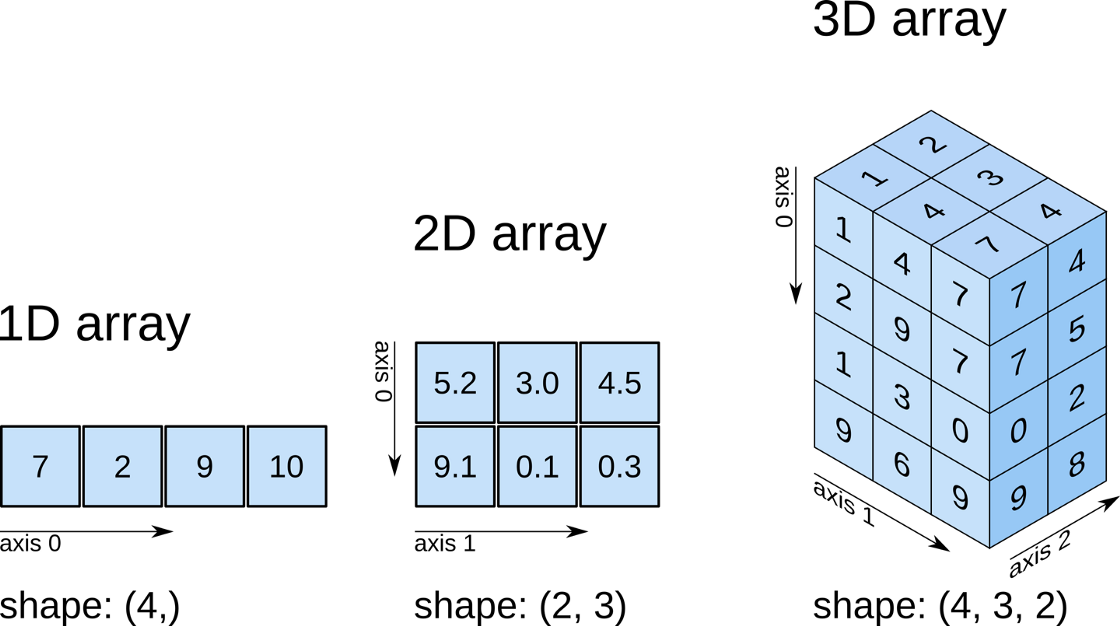

In [94]:
x = np.array([1, 2, 3, 4])
print(np.sum(x), x.sum())

10 10


In [95]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x)

[[1 2 3]
 [4 5 6]]


In [96]:
print(x.sum(axis=0)) # columns

[5 7 9]


In [97]:
print(x.sum(axis=1)) # rows

[ 6 15]


* Экстремумы

In [98]:
x = np.array([1, 3, 2])

In [99]:
x.min()

1

In [100]:
x.max()

3

In [101]:
x.argmin() # index of minimum

0

In [102]:
x.argmax() # index of maximum

1

* Статистика

In [103]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])

In [104]:
x.mean()

1.75

In [105]:
np.median(x)

1.5

In [106]:
np.median(y, axis=-1)

array([2., 5.])

In [107]:
x.std()

0.82915619758885

* Сортировка

In [108]:
a = np.array([[4, 3, 5], [1, 2, 1]])

In [109]:
print(np.sort(a, axis=1))
print(a)

[[3 4 5]
 [1 1 2]]
[[4 3 5]
 [1 2 1]]


In [110]:
a.sort(axis=1) # in-place sort
print(a)

[[3 4 5]
 [1 1 2]]


In [111]:
a = np.array([4, 3, 1, 2])
j = np.argsort(a)
print(j)

[2 3 1 0]


In [112]:
print(a[j])

[1 2 3 4]


#### Broadcasting
* Основные операции над массивами `numpy` выполняются поэлементно
* Необходимо следить за соответствием размеров массивов
* В некоторых случаях можно выполнять операции с массивами разных размеров. При этом `numpy` автоматически преобразовывает размеры массивов

In [113]:
a = np.ones((4, 5))
print(a)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [114]:
a[0] = 2
print(a)

[[2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


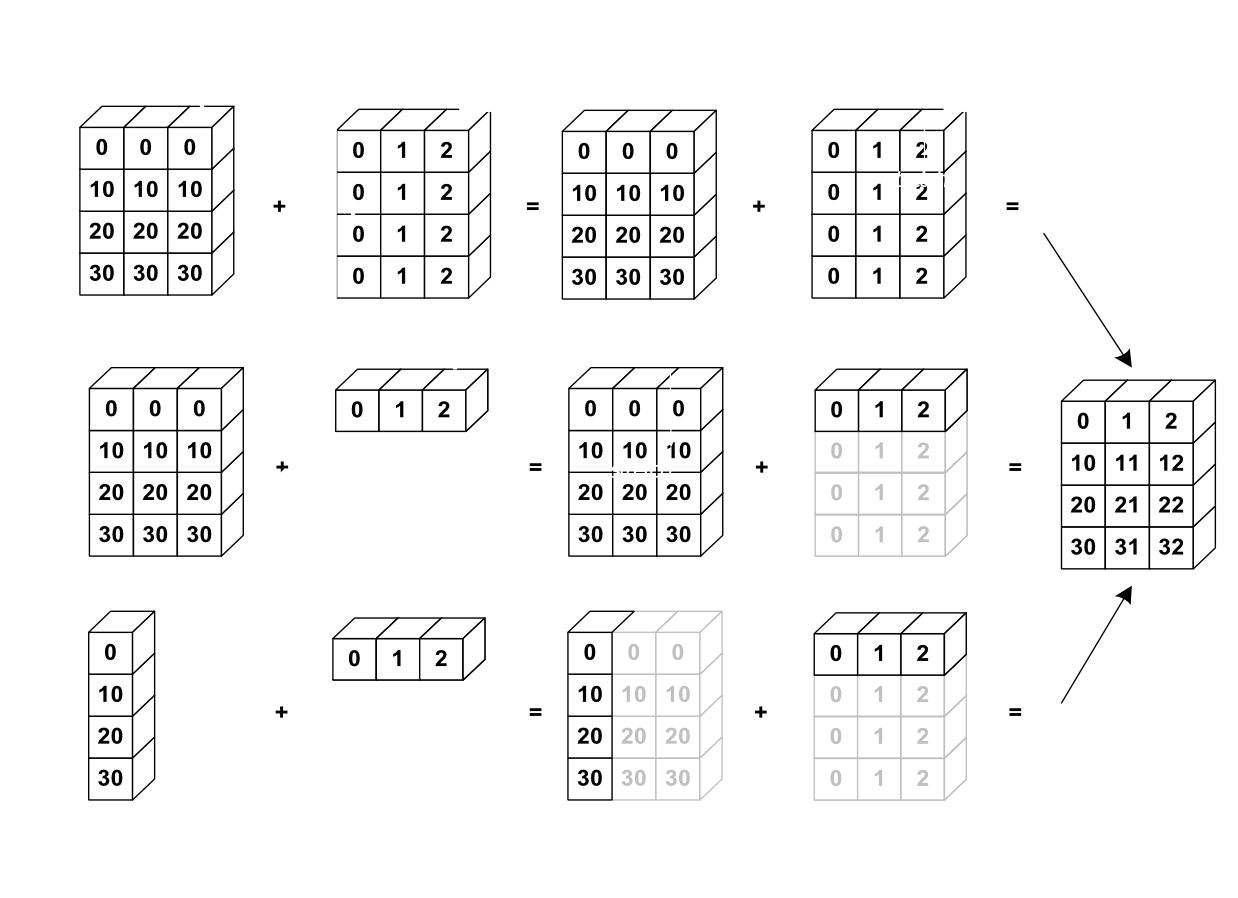

#### Полиномы в `numpy`
Пример: $3𝑥^2+2𝑥−1$

In [129]:
p = np.polynomial.Polynomial([-1, 2, 3])
p

Polynomial([-1.,  2.,  3.], domain=[-1,  1], window=[-1,  1])

In [130]:
p(0)

-1.0

In [131]:
p.degree()

2

In [132]:
print(p.roots())

[-1.          0.33333333]


In [140]:
x = np.linspace(-1, 1, 200)
y = np.cos(x) + np.cos(2*x + 0.3) + 0.4*np.cos(6*x + 0.9) + 0.3*np.random.default_rng(seed=1).random(200)
p = np.polynomial.Chebyshev.fit(x, y, 8)

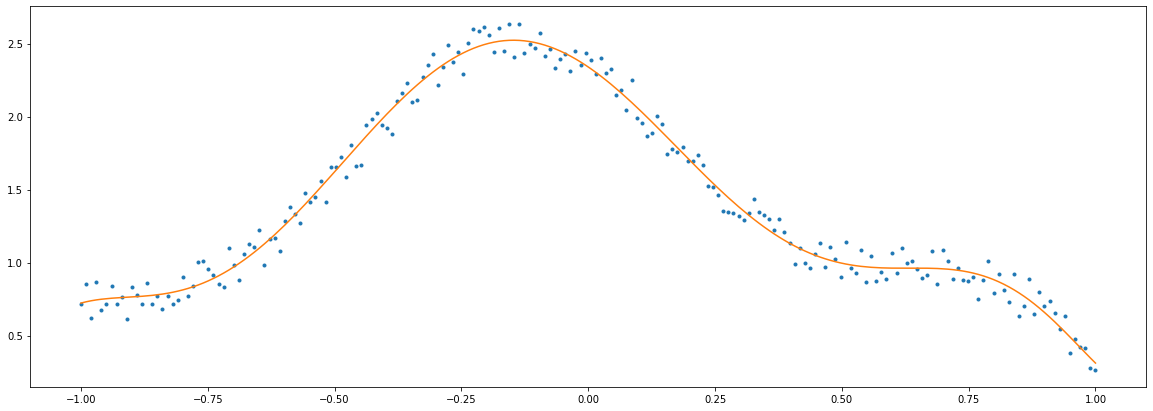

In [141]:
plt.figure(num=2, figsize=(20, 7))
plt.plot(x, y, '.')
plt.plot(x, p(x))
plt.show()

#### Работа с файлами в `numpy`
* Бинарный формат `.npy` позволяет быстро записывать/считывать данные, выполняет сжатие данных
* `numpy` поддерживает несколько других форматов данных. Читайте документацию

In [146]:
data = np.loadtxt('data/population.txt')
np.savetxt('data/pop.txt', data)
np.save('data/pop', d ata)
data3 = np.load('data/pop.npy')
print(data3)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


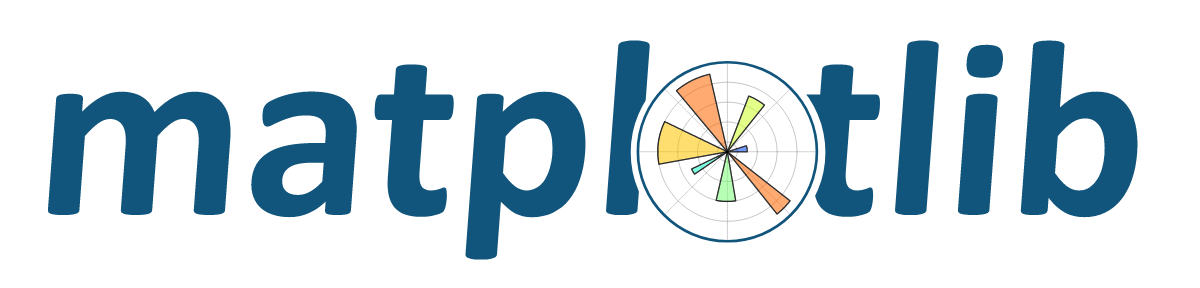

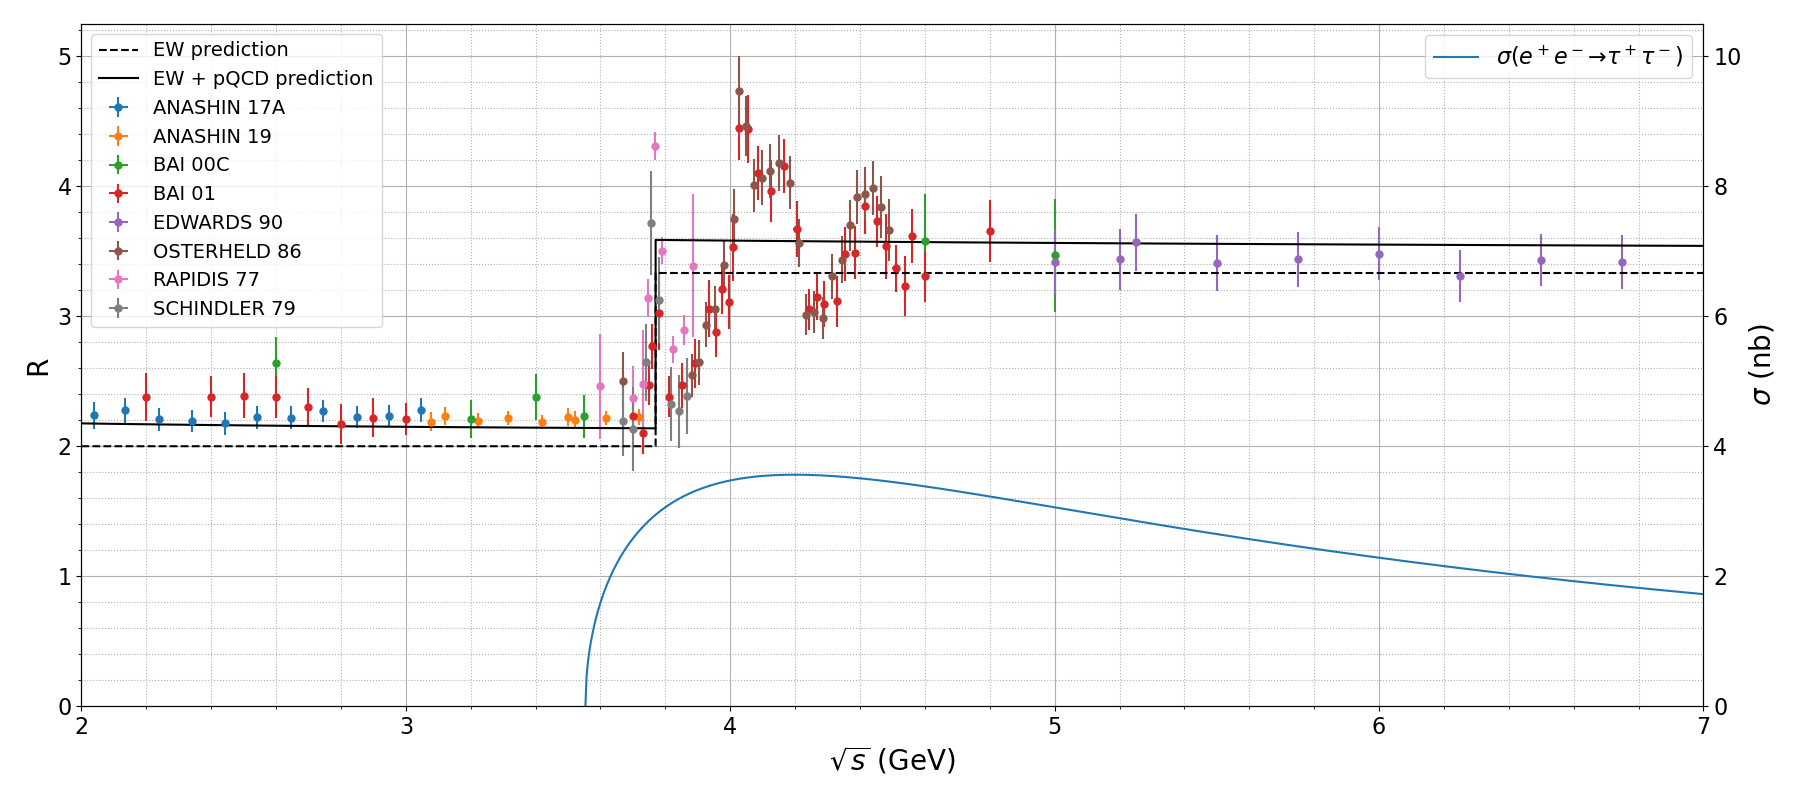

Простой график

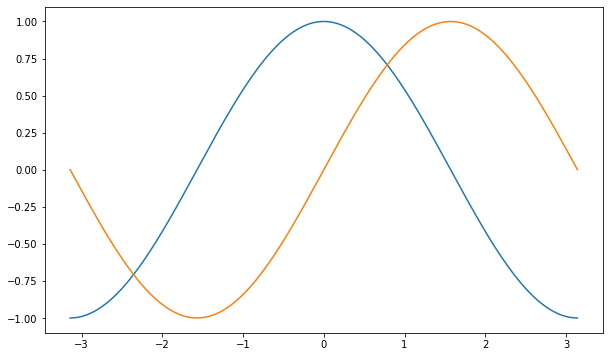

In [147]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(-np.pi, np.pi, 256)
plt.figure(num=3, figsize=(10,6))
plt.plot(X, np.cos(X))
plt.plot(X, np.sin(X));

Подкрутим параметры...

In [150]:
def make_plot1():
    plt.figure(figsize=(8, 5), dpi=80)
    x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
    c, s = np.cos(x), np.sin(x)

    plt.plot(x, c, color='blue', linewidth=2.5, linestyle='-', label='cos')
    plt.plot(x, s, color='red',  linewidth=2.5, linestyle='-', label='sin')

    plt.xlabel(r'$\alpha$ (radians)', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.grid()
    plt.legend(loc='best')

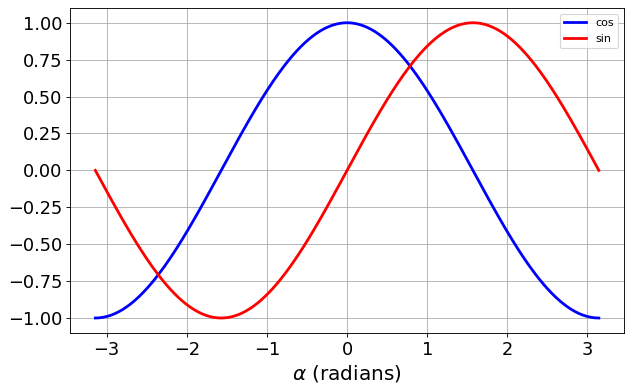

In [151]:
make_plot1()

И ещё...

In [152]:
def make_plot2():
    plt.figure(figsize=(8, 5), dpi=80)
    plt.subplot(111)
    X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
    C, S = np.cos(X), np.sin(X)
    plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
    plt.plot(X, S, color="red", linewidth=2.5, linestyle="-", label="sine")
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    plt.xlim(X.min() * 1.1, X.max() * 1.1)
    plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
    plt.ylim(C.min() * 1.1, C.max() * 1.1)
    plt.yticks([-1, +1], [r'$-1$', r'$+1$'])
    t = 2*np.pi/3
    plt.plot([t, t], [0, np.cos(t)],
    color='blue', linewidth=1.5, linestyle="--")
    plt.scatter([t, ], [np.cos(t), ], 50, color='blue')
    plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$', xy=(t, np.sin(t)),
                 xycoords='data', xytext=(+10, +30), textcoords='offset points',
                 fontsize=16, arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
    plt.plot([t, t], [0, np.sin(t)],
    color='red', linewidth=1.5, linestyle="--")
    plt.scatter([t, ], [np.sin(t), ], 50, color='red')
    plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$', xy=(t, np.cos(t)), xycoords='data',
                 xytext=(-90, -50), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
    plt.legend(loc='upper left')

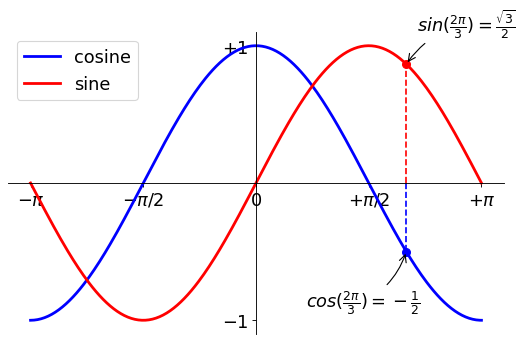

In [155]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
make_plot2()
plt.show()

### `Figure`
`plt.figure` – графическое окно в целом

In [24]:
figure = plt.figure(
  num=1,          # number of figure
  figsize=(8, 5), # figure size in inches (width, height)
  dpi=80,         # resolution in dots per inch
  facecolor='w',  # color of the drawing background
  edgecolor='w',  # color of edge around the drawing background
  frameon=True    # draw figure frame or not
)

<Figure size 640x400 with 0 Axes>

Можно изменять значения по умолчанию, задавая `figure.figsize`, `figure.dpi`, `figure.facecolor` и `figure.edgecolor`

### `Subplots` и `Axes`
`subplot` позволяет располагать графики на регулярной сетке внутри `figure`  
<img src="figs/subplot2.png" style="width: 1200px;"/>

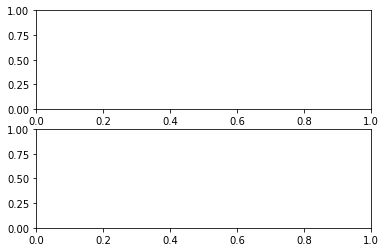

In [25]:
plt.figure(figsize=(6, 4))
plt.subplot(2, 1, 1)
# draw something on top subplot
plt.subplot(2, 1, 2)
# draw something on bottom subplot

`axes` позволяет разместить график в произвольном месте внутри `figure`

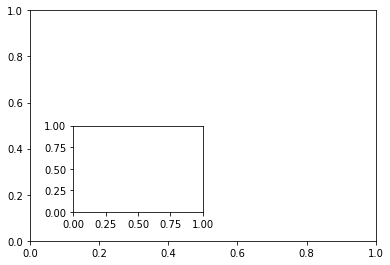

In [26]:
plt.figure(figsize=(6, 4))
plt.axes([.1, .1, .8, .8])
# draw something on large axis
plt.axes([.2, .2, .3, .3])
# draw something on small axis

### Настройки
* Пределы
* Логарифмический масштаб
* Сетка
* Ticks

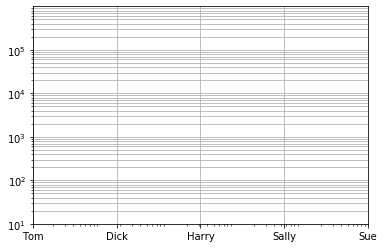

In [29]:
plt.xlim( 1, 10**5)
plt.ylim(10, 10**6)
plt.semilogx()
plt.semilogy()
#plt.loglog()
plt.grid(True, 'major', 'both')
plt.grid(True, 'minor', 'y')
plt.yticks(np.logspace(1, 5, 5))
plt.xticks(np.logspace(0, 5, 5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue'))
plt.draw()

### Графики с ошибками
[Документация](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html)


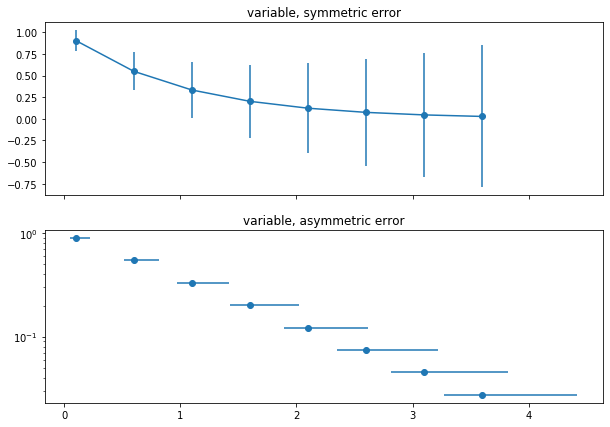

In [30]:
# https://matplotlib.org/gallery/statistics/errorbar_features.html
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
error = 0.1 + 0.2 * x
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 7))
ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')
asym = [0.4 * error, error]
ax1.errorbar(x, y, xerr=asym, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
plt.show()

### Scatter plot
http://www.scipy-lectures.org/intro/matplotlib/auto_examples/plot_scatter.html

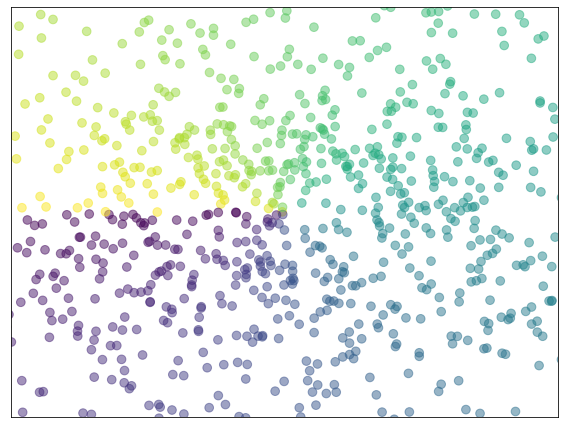

In [31]:
n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)
plt.figure(num=6, figsize=(8,6))
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(X, Y, s=75, c=T, alpha=.5)
plt.xlim(-1.5, 1.5)
plt.xticks(())
plt.ylim(-1.5, 1.5)
plt.yticks(())
plt.show()

### Гистограммы
* Инструмент `pyplot.hist` не столь хорош (imho)
* Альтернативным решением является комбинация `np.histogram` и `plt.plot`

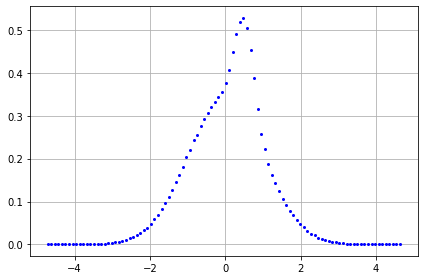

In [32]:
n = 10**6
data = np.append(np.random.normal(0, 1, n), np.random.normal(.5, .25, n // 6))
hist, bins = np.histogram(data, bins=100, density=True)
bins = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bins, hist, 'bo', markersize=2)
plt.tight_layout()
plt.grid()

Изучайте документацию

In [33]:
?? np.append

### Другие интересные графические пакеты
* `Seaborn` (высокоуровневый интерфейс к matplotlib) [seaborn.pydata.org](https://seaborn.pydata.org/)
* `Mayavi` (3D рисование) [docs.enthought.com/mayavi/mayavi/](https://docs.enthought.com/mayavi/mayavi/)
* `PyQtGraph` [pyqtgraph.org](http://www.pyqtgraph.org/)
* `Plotly` [plot.ly/python](https://plot.ly/python/)

<img src="figs/scipy.png" style="width: 75px;"/>

## SciPy Library
* Пакет `scipy` содержит разнообразные инструменты для научных вычислений
* Подмодули `scipy` соответствуют разным областям применения, там как интерполяция, интегрирование, оптимизация, обработки изображений, статистика, специальные функции и другие
* `scipy` можно сравнить с другими стандартными библиотеками для научных вычислений, такими как GSL

* `scipy.cluster` - Vector quantization, k-means
* `scipy.constants` - константы
* `scipy.fftpack` - преобразование Фурье
* `scipy.integrate` - интегрирование
* `scipy.interpolate` - интерполяция
* `scipy.io` - инструменты ввода-вывода
* `scipy.linalg` - линейная алгебра
* `scipy.ndimage` - обработка многомерных изображений
* `scipy.odr` - orthogonal distance regression
* `scipy.optimize` - оптимизация параметров
* `scipy.signal` - обработка сигналов
* `scipy.sparse` - разраженные матрицы
* `scipy.spatial` - пространственные структуры данных и алгоритмы
* `scipy.special` - специальные функции
* `scipy.stats` - статистика

### `scipy.special`
[docs.scipy.org/doc/scipy/reference/special.html](https://docs.scipy.org/doc/scipy/reference/special.html)

In [34]:
import scipy.special as spec

Функция Бесселя первого рода

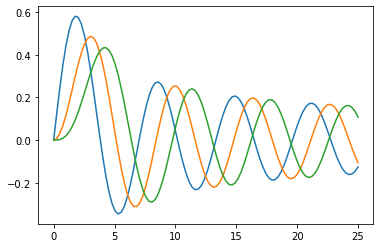

In [35]:
x = np.linspace(0, 25, 100)
plt.plot(x, spec.jn(1, x))
plt.plot(x, spec.jn(2, x))
plt.plot(x, spec.jn(3, x));

Эллиптические функции
<img src="figs/elliptic.png" style="width: 800px;"/>

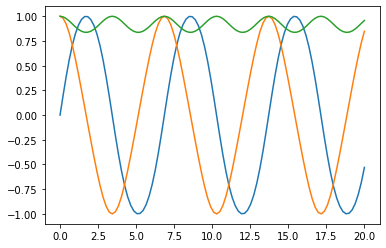

In [36]:
x = np.linspace(0, 20, 100)
sn, cn, dn, ph = spec.ellipj(x, 0.3)
plt.plot(x, sn)
plt.plot(x, cn)
plt.plot(x, dn);
#plt.plot(x, ph);

Гамма-функция

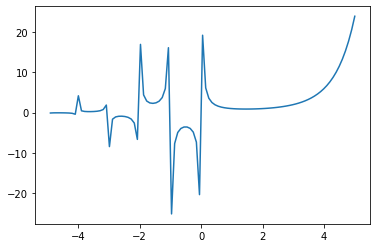

In [40]:
x = np.linspace(-5, 5, 100)
plt.plot(x, spec.gamma(x))

Логарифмическая гамма-функция

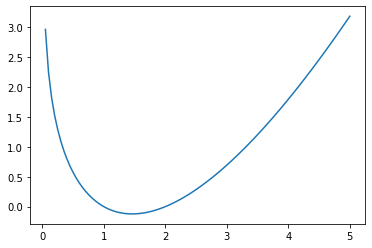

In [41]:
x = np.linspace(0, 5, 100)
plt.plot(x, spec.gammaln(x))

Функция ошибок

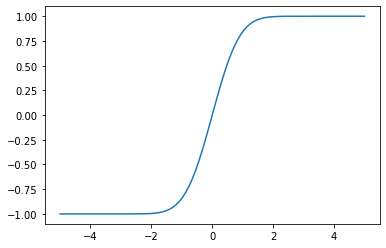

In [42]:
x = np.linspace(-5, 5, 100)
plt.plot(x, spec.erf(x))

### Численное интегрирование

In [43]:
from scipy.integrate import quad

In [44]:
quad(lambda x: spec.jv(2.5, x), 0., 4.5)

(1.1178179380783253, 7.866317216380692e-09)

* Больше примеров: [docs.scipy.org/doc/scipy/reference/tutorial/integrate.html](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)
* Полная документация: [docs.scipy.org/doc/scipy/reference/integrate.html](https://docs.scipy.org/doc/scipy/reference/integrate.html)

### Линейная алгебра
Стандартные операции линейной алгебры
* Определитель
* Обратная матрица
* Разложение по сингулярным значениям

В основе лежат эффективные библиотеки `BLAS` и `LAPACK`

In [45]:
from scipy.linalg import det, inv, svd

In [46]:
arr = np.array([[1, 2], [3, 4]])
det(arr)

-2.0

In [47]:
iarr = inv(arr)
np.allclose(np.dot(arr, iarr), np.eye(2)) # True

True

In [48]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = svd(arr)
print(uarr, spec, vharr)

[[-0.1617463  -0.98659196  0.02178164]
 [-0.47456365  0.09711667  0.87484724]
 [-0.86523261  0.13116653 -0.48390895]] [14.88982544  0.45294236  0.29654967] [[-0.45513179 -0.54511245 -0.70406496]
 [ 0.20258033  0.70658087 -0.67801525]
 [-0.86707339  0.45121601  0.21115836]]


In [ ]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr) # True

Больше интересного можно найти в полной документации [docs.scipy.org/doc/scipy/reference/linalg.html](https://docs.scipy.org/doc/scipy/reference/linalg.html)

### Интерполяция
[docs.scipy.org/doc/scipy/reference/interpolate.html](https://docs.scipy.org/doc/scipy/reference/interpolate.html)  
Основан на пакете `FITPACK` (`Fortran`)

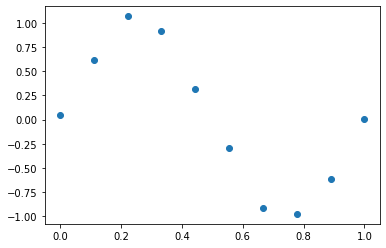

In [49]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2*np.pi * measured_time) + noise
plt.plot(measured_time, measures, 'o');

In [50]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

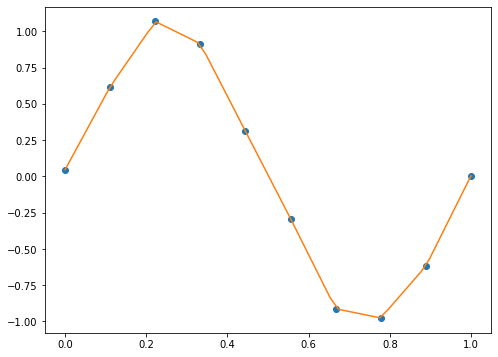

In [51]:
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
plt.figure(num=1, figsize=(8,6))
plt.plot(measured_time, measures, 'o');
plt.plot(interpolation_time, linear_results);

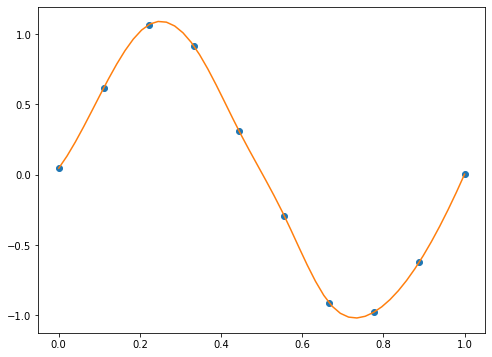

In [52]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)
plt.figure(num=2, figsize=(8,6))
plt.plot(measured_time, measures, 'o');
plt.plot(interpolation_time, cubic_results);

### Задачи оптимизации

In [53]:
from scipy.optimize import curve_fit, minimize

Аппроксимация

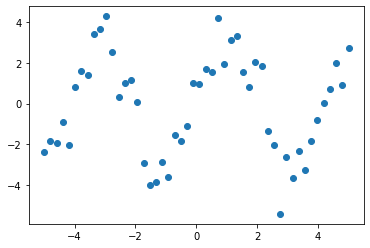

In [54]:
x = np.linspace(-5, 5, num=50)
y = 2.9 * np.sin(1.5 * x) + np.random.normal(size=50)
plt.plot(x, y, 'o');

In [55]:
def func(x, a, b):
    return a * np.sin(b * x)

pars, cov = curve_fit(func, x, y, p0=[2, 2])
print(pars, cov)

[3.19066892 1.49922297] [[ 0.03966068 -0.00043347]
 [-0.00043347  0.00041426]]


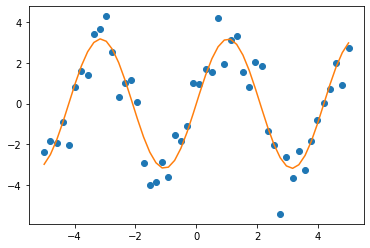

In [56]:
plt.plot(x, y, 'o')
plt.plot(x, func(x, *pars));

Поиск минимума с `minimize`

In [57]:
def f(x):
    return x**2 + 10*np.sin(x)

In [58]:
result = minimize(f, x0=0)
print(result.x)

[-1.30644012]


`minimize` может искать минимум функции нескольких переменных

### Статистика
Пакет `scipy.stats`

Содержит большое количество непрерывных (`norm`, ...) и дискретных (`bernoulli`, ...) распределений случайных величин, статистических функций (`moment`, ...) и других инструментов для статистического анализа данных

[docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html)

[scipy-lectures.org/packages/statistics/index.html](http://www.scipy-lectures.org/packages/statistics/index.html)

In [59]:
import scipy.stats

In [60]:
samples = np.random.normal(size=1000)
loc, std = scipy.stats.norm.fit(samples)
loc, std

(-0.006574431864782877, 1.011710977649427)

In [61]:
median = scipy.stats.scoreatpercentile(samples, 50)
median

0.01276763279442523

t-критерий Стьюдента

In [68]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
scipy.stats.ttest_ind(a, b)

Ttest_indResult(statistic=-7.121900273036997, pvalue=1.242971120409554e-10)

In [69]:
?? scipy.stats.ttest_ind

### Быстрое преобразование Фурье
* `scipy.fftpack.fft()` выполняет FFT
* `scipy.fftpack.fftfreq()` генерирует частоты дискретизации
* `scipy.fftpack.ifft()` выполняет обратное FFT

[scipy-lectures.org/intro/scipy/auto_examples/plot_fftpack.html](http://www.scipy-lectures.org/intro/scipy/auto_examples/plot_fftpack.html)

In [70]:
from scipy import fftpack

In [71]:
tstep, T = 0.1, 5.
tvec = np.arange(0, 20, tstep)
sig = (np.sin(2 * np.pi / T * tvec) + 0.5 * np.random.randn(tvec.size))

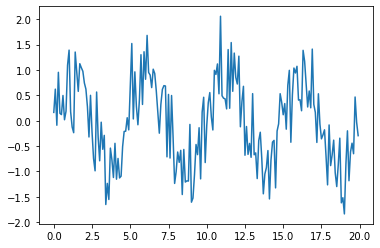

In [72]:
plt.plot(tvec, sig);

In [73]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)
# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)
# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=tstep)

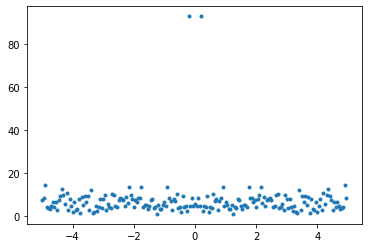

In [74]:
plt.plot(sample_freq, power, '.');

<img src="figs/scipy2.png" style="width: 175px;"/>

## SymPy Library
Символьные вычисления в Python
* Sympy использует `mpmath` для вычислений произвольной точности
* Используйте `subs` для вычисления функции в точке, либо для символьной замены
* Используйте `evalf` для вычисления выражения с нужной точностью

In [75]:
import sympy as sym
a = sym.Float(1)
b = sym.Rational(1, 2)
c = sym.Integer(1)
x = sym.Symbol('x')
`
y = x**2 + b * x + a
print(y.subs(x, 1)) # 2.5
print(y.subs(x, c)) # 2.5

ModuleNotFoundError: No module named 'sympy'

In [ ]:
print(sym.exp(b))
print(sym.exp(b).evalf())
print(sym.exp(b).evalf(50))

Алгебраические манипуляции

In [ ]:
x = sym.Symbol('x')
z = sym.Symbol('z')
sym.expand((x + z) ** 3)

In [ ]:
sym.expand(sym.cos(x + z), trig=True)

In [ ]:
sym.expand(x + z, complex=True)

In [ ]:
x = sym.Symbol('x')
z = sym.Symbol('z')
sym.simplify((x + x * z) / x)

Смотрите также `powsimp`, `trigsimp`, `logcombine` и `radsimp`

In [ ]:
?? sym.radsimp

### Calculus
* Пределы `limit(function, variable, point)`

In [ ]:
sym.limit(sym.sin(x)/x, x, 0) # 1

In [ ]:
sym.limit(x, x, sym.oo)       # oo

In [ ]:
sym.limit(1 / x, x, sym.oo)   # 0

In [ ]:
sym.limit(x**x, x, 0)         # 1

* Дифференцирование `diff(func, var)`

In [ ]:
sym.diff(sym.sin(x), x)

In [ ]:
sym.diff(sym.sin(2 * x), x, 3)

* Интегрирование

In [ ]:
sym.integrate(6 * x**5, x)

In [ ]:
sym.integrate(sym.exp(-x ** 2) * sym.erf(x), x)

In [ ]:
sym.integrate(sym.sin(x), (x, 0, sym.pi / 2))

In [ ]:
sym.integrate(sym.exp(-x), (x, 0, sym.oo))

* Разложение в ряд `series(expr, var)`

In [ ]:
sym.series(sym.cos(x), x)

In [ ]:
sym.series(sym.cos(x), x, x0=0, n=9)

### Решение уравнений
* Поиск корней уравнения

In [ ]:
x, y, z = sym.symbols('x y z')
sym.solveset(x ** 4 - 1, x)

In [ ]:
sym.solveset(sym.exp(x) + 1, x)

In [ ]:
sym.solve((     x + 5 * y - 2,
           -3 * x + 6 * y - 15),
          (x, y))

* Разложение на множители

In [ ]:
sym.factor(x**4 - 3 * x**2 + 1)

* Булевы уравнения

In [ ]:
sym.satisfiable(x & y)

In [ ]:
sym.satisfiable(x & ~x)

* Дифференциальные уравнения

In [ ]:
f, g = sym.symbols('f g', cls=sym.Function)
sym.dsolve(f(x).diff(x, x) + f(x), f(x))

# Конец
* Навык работы с `SciPy` открывает дорогу к более продвинутым инструментам анализа данных и машинного обучения (`scikit-learn`, `tensorflow`, `xgboost`, `catboost`, ...)
* Кроме `C++` и `python` есть много интересных языков программирования. Рекомендую обратить внимание на языки `Rust` и `Julia`